# Business Case - Olist _(7 heures)_

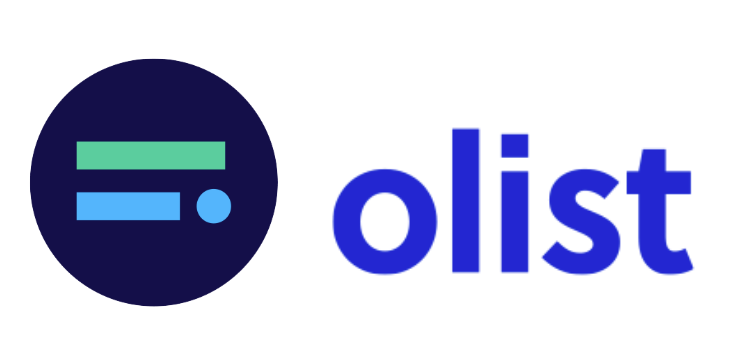

- Olist est implanté et n’opère qu’au Brésil.

- C’est une entreprise 100% numérique. En effet, les opérations commerciales sont entièrement gérées en ligne).

- Service e-commerce pour les vendeurs.

- Connecte les (petits) commerçants aux places de marché les plus importantes du Brésil (Amazon, Bahia, Walmart, ...).

- Offre des services de logistique et de gestion des stocks aux vendeurs.

- Ne vend rien directement aux consommateurs.




# Votre mission

Objectif :
Aider les chefs d'entreprise dans leur processus de prise de décision.


Le PDG d'Olist, vous a chargé de donner un sens à l'ensemble des données afin de formuler des recommandations sur la question suivante :

**Comment accroître la satisfaction des clients d’Olist ?**

# La data

Informations sur environ 100 000 commandes effectuées entre 2016 et 2018.
Des données réelles !
Les informations identifiables ont été anonymisées.
Documentation complète disponible dans le dictionnaire mis à disposition.

## Le déroulement pour chaque vendeur


Le vendeur rejoint Olist et met en ligne à disposition d’Olist ses catalogues de produits.
Olist affiche ces catalogues sur les plateformes commerciales existantes (Amazon, Bahia, Walmart, ...).
Le vendeur reçoit une notification dès qu'un produit est vendu.
Le vendeur transmet les articles commandés à des transporteurs logistiques tiers.

Attention : Plusieurs vendeurs peuvent être impliqués dans la commande d'un client !


## Le déroulement pour le client


Le client parcourt les produits sur  les plateformes commerciales (Amazon, Bahia, Walmart, ...).
Il achète les produits listés via Olist.store.
Il obtient une date prévue pour la livraison, en tenant compte de l’estimation de l'heure d'arrivée.
Le client reçoit la/les commande(s) et laisse un commentaire.

Remarque : entre 2016 et mi-2018, un avis pouvait être laissé dès l'envoi de la commande, ce qui signifie qu'un client pouvait potentiellement laisser un avis pour un produit qu'il n'avait pas encore reçu !





**Vous devrez faire une présentation dans un premier temps sous slides, qui contient au minimum le contexte, la problématique, ainsi que la conclusion qui contient des RECOMMANDATIONS faites au client, dans le but d'améliorer la satisfaction des clients d'Olist. Aussi, vous utiliserez un dashboard pour convaincre le client, pour que les recommandations soit logiques à ses yeux. Pour rappel, la recommandation est l'élément central d'une présentation réalisée par un data analyst. En effet, à vous d'être convaincant, pour que vos arguments soient entendus. Il est donc nécessaire de développer un minimum d'expertise métier sur le sujet, pour être à l'aise avec ses recommandations.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer vos choix sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.
Le juré examinateur, lors de la partie question, peut vous poser des questions sur le code qui est contenu dans votre google colab. Il est donc indispensable de mettre à disposition dans les pièces soumises pour le passage oral, votre travail exploratoire contenu dans un google colab.



## Livrables attendus
Le client souhaite une présentation avec des slides (sous format pdf) et un tableau de bord intéractif (Power BI, Tableau ou autre outil de BI).  

La présentation contiendra à minima ces éléments :
- Rappel du contexte et de la problématique
- Recommandations
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés
- NLP: Utilisation des reviews contenus dans `order_reviews_df`, en intégrant au moins un "wordcloud" dans votre tableau de bord.
- Votre tableau de bord contient des graphiques.
- Votre tableau de bord contient au moins une visualisation de données interactive.
- Votre tableau de bord contient au moins une carte représentant des informations géographiques.
- Votre tableau de bord contient au moins un tableau croisé.
- L'ensemble des graphiques et visuels doit être lisible par tous (prise en compte des personnes en situation de handicap visuel).
- Réponse à la question métier : Recommandations pour accroître la satisfaction des clients d'Olist.

# C'est parti ! Importer les données

Exécutes les cellules ci-dessous pour récupérer les tables de données.

In [4]:
import pandas as pd
import zipfile
import io
import requests
import duckdb
import time

/var/folders/6w/gx5jy5414zb9bwt9sz78qyc00000gn/T/ipykernel_17272/3293836754.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/alex/code/olist/Olist/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
con = duckdb.connect(database='olist.duckdb')

In [10]:
start = time.time()

# import orders_customers_dataset
order_customers_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/orders_customers_dataset.csv").drop(columns = "Unnamed: 0")
con.sql("CREATE OR REPLACE TABLE order_customers AS SELECT * FROM order_customers_df")

# import geolocatio_dataset
response = requests.get("https://github.com/WildCodeSchool/wilddata/raw/main/geolocation_dataset.zip")
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()
geolocation_df = pd.read_csv("geolocation_dataset.csv").drop(columns = "Unnamed: 0")
con.sql("CREATE OR REPLACE TABLE geolocation AS SELECT * FROM geolocation_df")

# import order_items_dataset
order_items_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_items_dataset.csv").drop(columns = "Unnamed: 0")
con.sql("CREATE OR REPLACE TABLE order_items AS SELECT * FROM order_items_df")

# import order_payments_dataset
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_payments_dataset.csv").drop(columns = "Unnamed: 0")
con.sql("CREATE OR REPLACE TABLE order_payments AS SELECT * FROM order_payments_df")

# import order_reviews_dataset
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_reviews_dataset.csv").drop(columns = "Unnamed: 0")
con.sql("CREATE OR REPLACE TABLE order_reviews AS SELECT * FROM order_reviews_df")

# import orders_dataset
orders_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/orders_dataset.csv").drop(columns = "Unnamed: 0")
con.sql("CREATE OR REPLACE TABLE orders AS SELECT * FROM orders_df")

# import products_dataset
products_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/products_dataset.csv").drop(columns = "Unnamed: 0")
con.sql("CREATE OR REPLACE TABLE products AS SELECT * FROM products_df")

# import sellers_dataset
sellers_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/sellers_dataset.csv").drop(columns = "Unnamed: 0")
con.sql("CREATE OR REPLACE TABLE sellers AS SELECT * FROM sellers_df")

print(time.time() - start)

6.1254026889801025


Voici le schéma de la base de données:



---

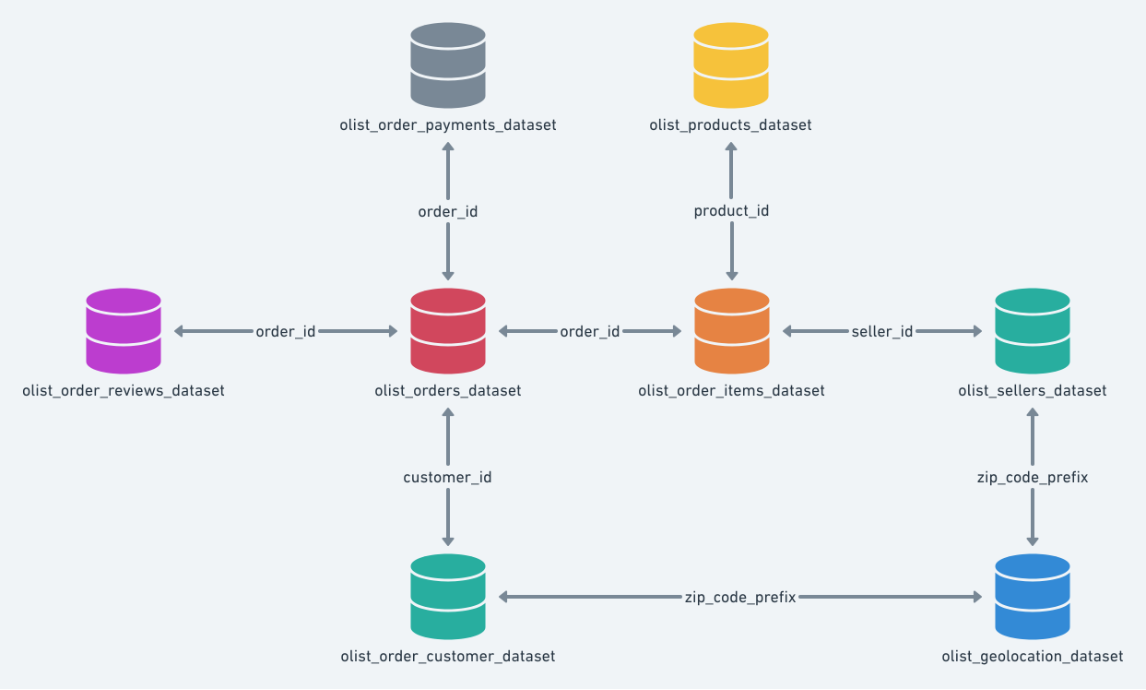

[Voici le dictionnaire qui permet d'avoir une explication détaillée](https://colab.research.google.com/drive/1c3mo2LuHMV3nPZigrS1O9mNaStNVH8jE?usp=sharing) sur chacune des colonnes de la base de données.

Votre travail commence ici:

In [6]:
def sql(query, table=False):
    if table:
        return con.sql(f"select * from {query}")
    else:
        return con.sql(f"{query}")

def join_tables(t1, t2, item):
    table = 'TempTable'
    con.sql(f'''
        CREATE OR REPLACE TABLE {table} AS
        select t1.*
        , t2.*
        from {t1} t1
        left join {t2} t2
            on t1.{item}_id=t2.{item}_id
        ''')
    con.sql(f'ALTER TABLE {table} DROP COLUMN "{item}_id:1"')
    return con.sql(f"select * from {table}")

In [7]:
sql('show tables').df()

,name
0,geolocation
1,order_customers
2,order_items
3,order_payments
4,order_reviews
5,orders
6,products
7,sellers


In [46]:
reviews__orders = join_tables('order_reviews', 'orders', 'order')

In [49]:
reviews__orders__items = join_tables('reviews__orders', 'order_items', 'order')

In [52]:
reviews__orders__items__sellers = join_tables('reviews__orders__items', 'sellers', 'seller')

In [53]:
reviews__orders__items__sellers.df()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,2018-02-02 00:00:00,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,14600.0,sao joaquim da barra,SP
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,2018-03-14 00:00:00,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30,12233.0,sao jose dos campos,SP
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,2018-03-09 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12,37175.0,ilicinea,MG
3,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,...,2018-03-09 00:00:00,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,134.25,81730.0,curitiba,PR
4,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,None,None,2017-07-16 00:00:00,2017-07-18 19:30:34,840be0730010e9580efd289bc9f37706,delivered,2017-06-30 15:38:46,...,2017-08-03 00:00:00,1.0,3152a0c0d93abeec99e4a6169aecc88b,d2374cbcbb3ca4ab1086534108cc3ab7,2017-07-20 15:50:17,46.90,11.85,14940.0,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113126,6d985039d8f88b33d7d987b8d82a20b4,df77e62df88949a20bf8bb2c2d9cb2ed,4,None,None,2017-06-08 00:00:00,2017-06-10 16:17:53,80c0a38fb7948e73974c07ea359aa626,invoiced,2017-05-07 17:57:19,...,2017-06-06 00:00:00,3.0,5eae236b07a8c5db6299c7f9c3ba2e6e,638cba8be1fb599bbb76fd6948351eb3,2017-05-18 09:50:24,12.50,11.85,12242.0,sao jose dos campos,SP
113127,6d985039d8f88b33d7d987b8d82a20b4,df77e62df88949a20bf8bb2c2d9cb2ed,4,None,None,2017-06-08 00:00:00,2017-06-10 16:17:53,80c0a38fb7948e73974c07ea359aa626,invoiced,2017-05-07 17:57:19,...,2017-06-06 00:00:00,2.0,5eae236b07a8c5db6299c7f9c3ba2e6e,638cba8be1fb599bbb76fd6948351eb3,2017-05-18 09:50:24,12.50,11.85,12242.0,sao jose dos campos,SP
113128,6d985039d8f88b33d7d987b8d82a20b4,df77e62df88949a20bf8bb2c2d9cb2ed,4,None,None,2017-06-08 00:00:00,2017-06-10 16:17:53,80c0a38fb7948e73974c07ea359aa626,invoiced,2017-05-07 17:57:19,...,2017-06-06 00:00:00,1.0,924260f2993f33c639e6226173f07e8f,638cba8be1fb599bbb76fd6948351eb3,2017-05-18 09:50:24,18.90,11.85,12242.0,sao jose dos campos,SP
113129,8b490825def65415303a602987384b43,2f99eb7c20846f2cfab5cf7c257370ab,1,None,recebi meu pedido faltando um kit progressiva....,2017-11-11 00:00:00,2017-11-16 11:31:31,65095fecef8545e033e0b83b85e146fa,delivered,2017-11-03 09:40:30,...,2017-12-04 00:00:00,1.0,4dddd45aa241530edb5412e8846361fa,093805f8f2aeb63881444571e1f48f30,2017-11-09 09:50:41,39.90,17.21,6236.0,osasco,SP


In [44]:
import plotly.express as px

In [54]:
review_by_month = duckdb.sql('''
select avg(review_score) as avg_review
, concat(month(review_creation_date::TIMESTAMP),'-', year(review_creation_date::TIMESTAMP)) as Date
from reviews__orders__items__sellers
group by month(review_creation_date::TIMESTAMP), year(review_creation_date::TIMESTAMP)
order by year(review_creation_date::TIMESTAMP), month(review_creation_date::TIMESTAMP)
''').df()

fig = px.bar(x=review_by_month.Date, y=review_by_month.avg_review)
fig.show()

In [55]:
from dash import Dash, html

app = Dash(__name__)

app.layout = html.Div([
    html.Div(children='Hello World')
])

if __name__ == '__main__':
    app.run(debug=True)

ModuleNotFoundError: No module named 'dash'